In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import FreqDist
import seaborn as sns
import collections
from collections import Counter

In [2]:
# Analiza comparativa la gen de joc 
review=pd.read_csv('Appsdata_with_genres.csv')
df = pd.DataFrame(review, columns=["developer","developerId","scoreText","Genre2"])
genuri=df["Genre2"]
frecvGenuri = FreqDist(genuri).most_common(20)
frecvGenuri = pd.Series(dict(frecvGenuri)) #conversie in pandas

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

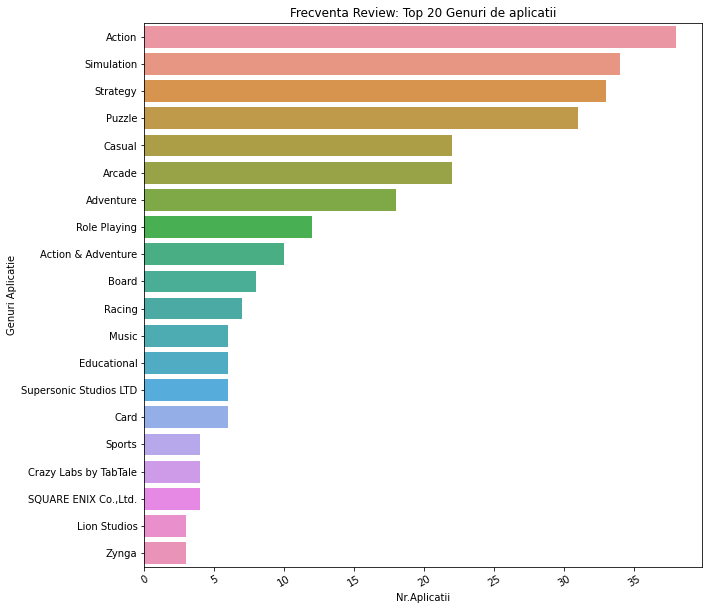

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(y=frecvGenuri.index, x=frecvGenuri.values,orient='h', ax=ax)
plt.title("Frecventa Review: Top 20 Genuri de aplicatii")
plt.xlabel("Nr.Aplicatii")
plt.ylabel("Genuri Aplicatie")
plt.rcParams.update({'font.size': 22})
plt.xticks(rotation=30)

In [4]:
denDezvoltatori=df["developer"]
frecvDezvoltatori = FreqDist(denDezvoltatori).most_common(20)
frecvDezvoltatori = pd.Series(dict(frecvDezvoltatori)) #conversie in pandas
#irrelevant numele dezvoltatorilor

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

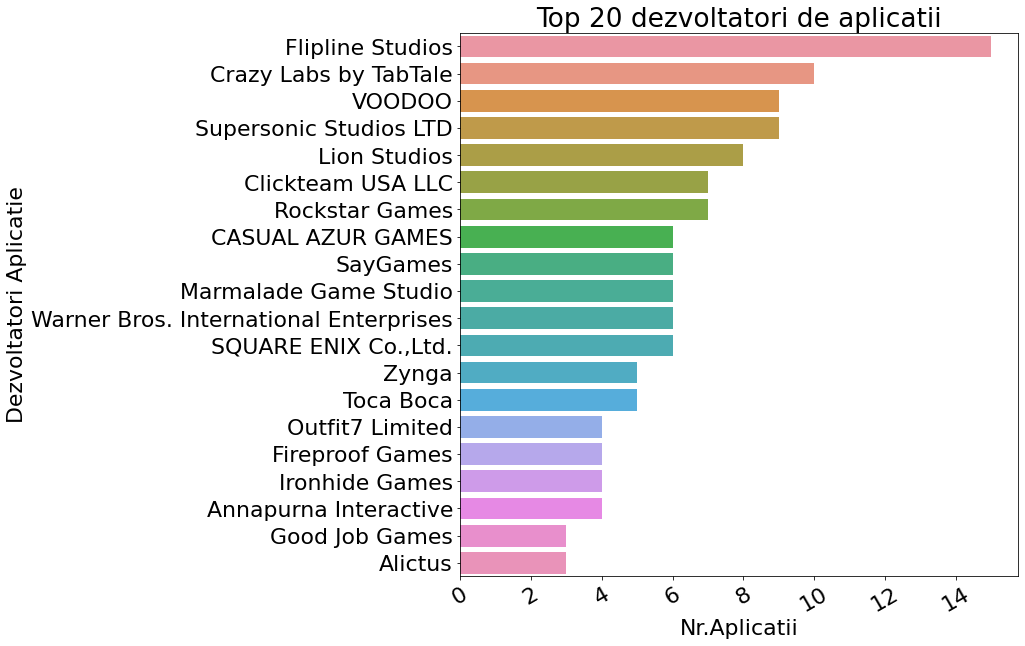

In [5]:
#Analiza comparativa la gen de joc si denumirea la dezvoltator
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(y=frecvDezvoltatori.index, x=frecvDezvoltatori.values,orient='h', ax=ax)
plt.title("Top 20 dezvoltatori de aplicatii")
plt.xlabel("Nr.Aplicatii")
plt.ylabel("Dezvoltatori Aplicatie")
plt.rcParams.update({'font.size': 22})
plt.xticks(rotation=30)

In [6]:
genre_most_com = frecvGenuri.index.tolist()
dg=pd.read_csv('Appsdata_with_genres.csv')
dg["Genre2"]

0          Action
1          Action
2          Casual
3           Board
4          Casual
          ...    
395      Strategy
396        Action
397        Casual
398    Simulation
399      Strategy
Name: Genre2, Length: 400, dtype: object

In [7]:
dg_pars = {}
for index, row in dg.iterrows():
    if row["Genre2"] in genre_most_com:
        key = row["developer"]
        val = row["Genre2"]
        if key not in dg_pars.keys():
            dg_pars[key] = [val]
        else:
            dg_pars[key].append(val)

In [8]:
ds_pars_2 = collections.OrderedDict(sorted(dg_pars.items(), key= lambda x: len(x[1]), reverse=True)[:20])

In [9]:
colors = ['#84DE02', 
    '#E88E5A',
    '#DDE26A',
    '#C53151',
    '#FFDF46',
    '#B05C52',
    '#FF4466',
    '#828E84',
    '#FD5240',
    '#391285',
    '#FF85CF',
    '#FF4681',
    '#4BC7CF',
    '#FF6D3A',
    '#FF404C',
    '#A0E6FF',
    '#C9A0DC',
    '#DA8A67',
    '#736A62',
    '#FC80A5']

c:\users\elena\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\elena\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


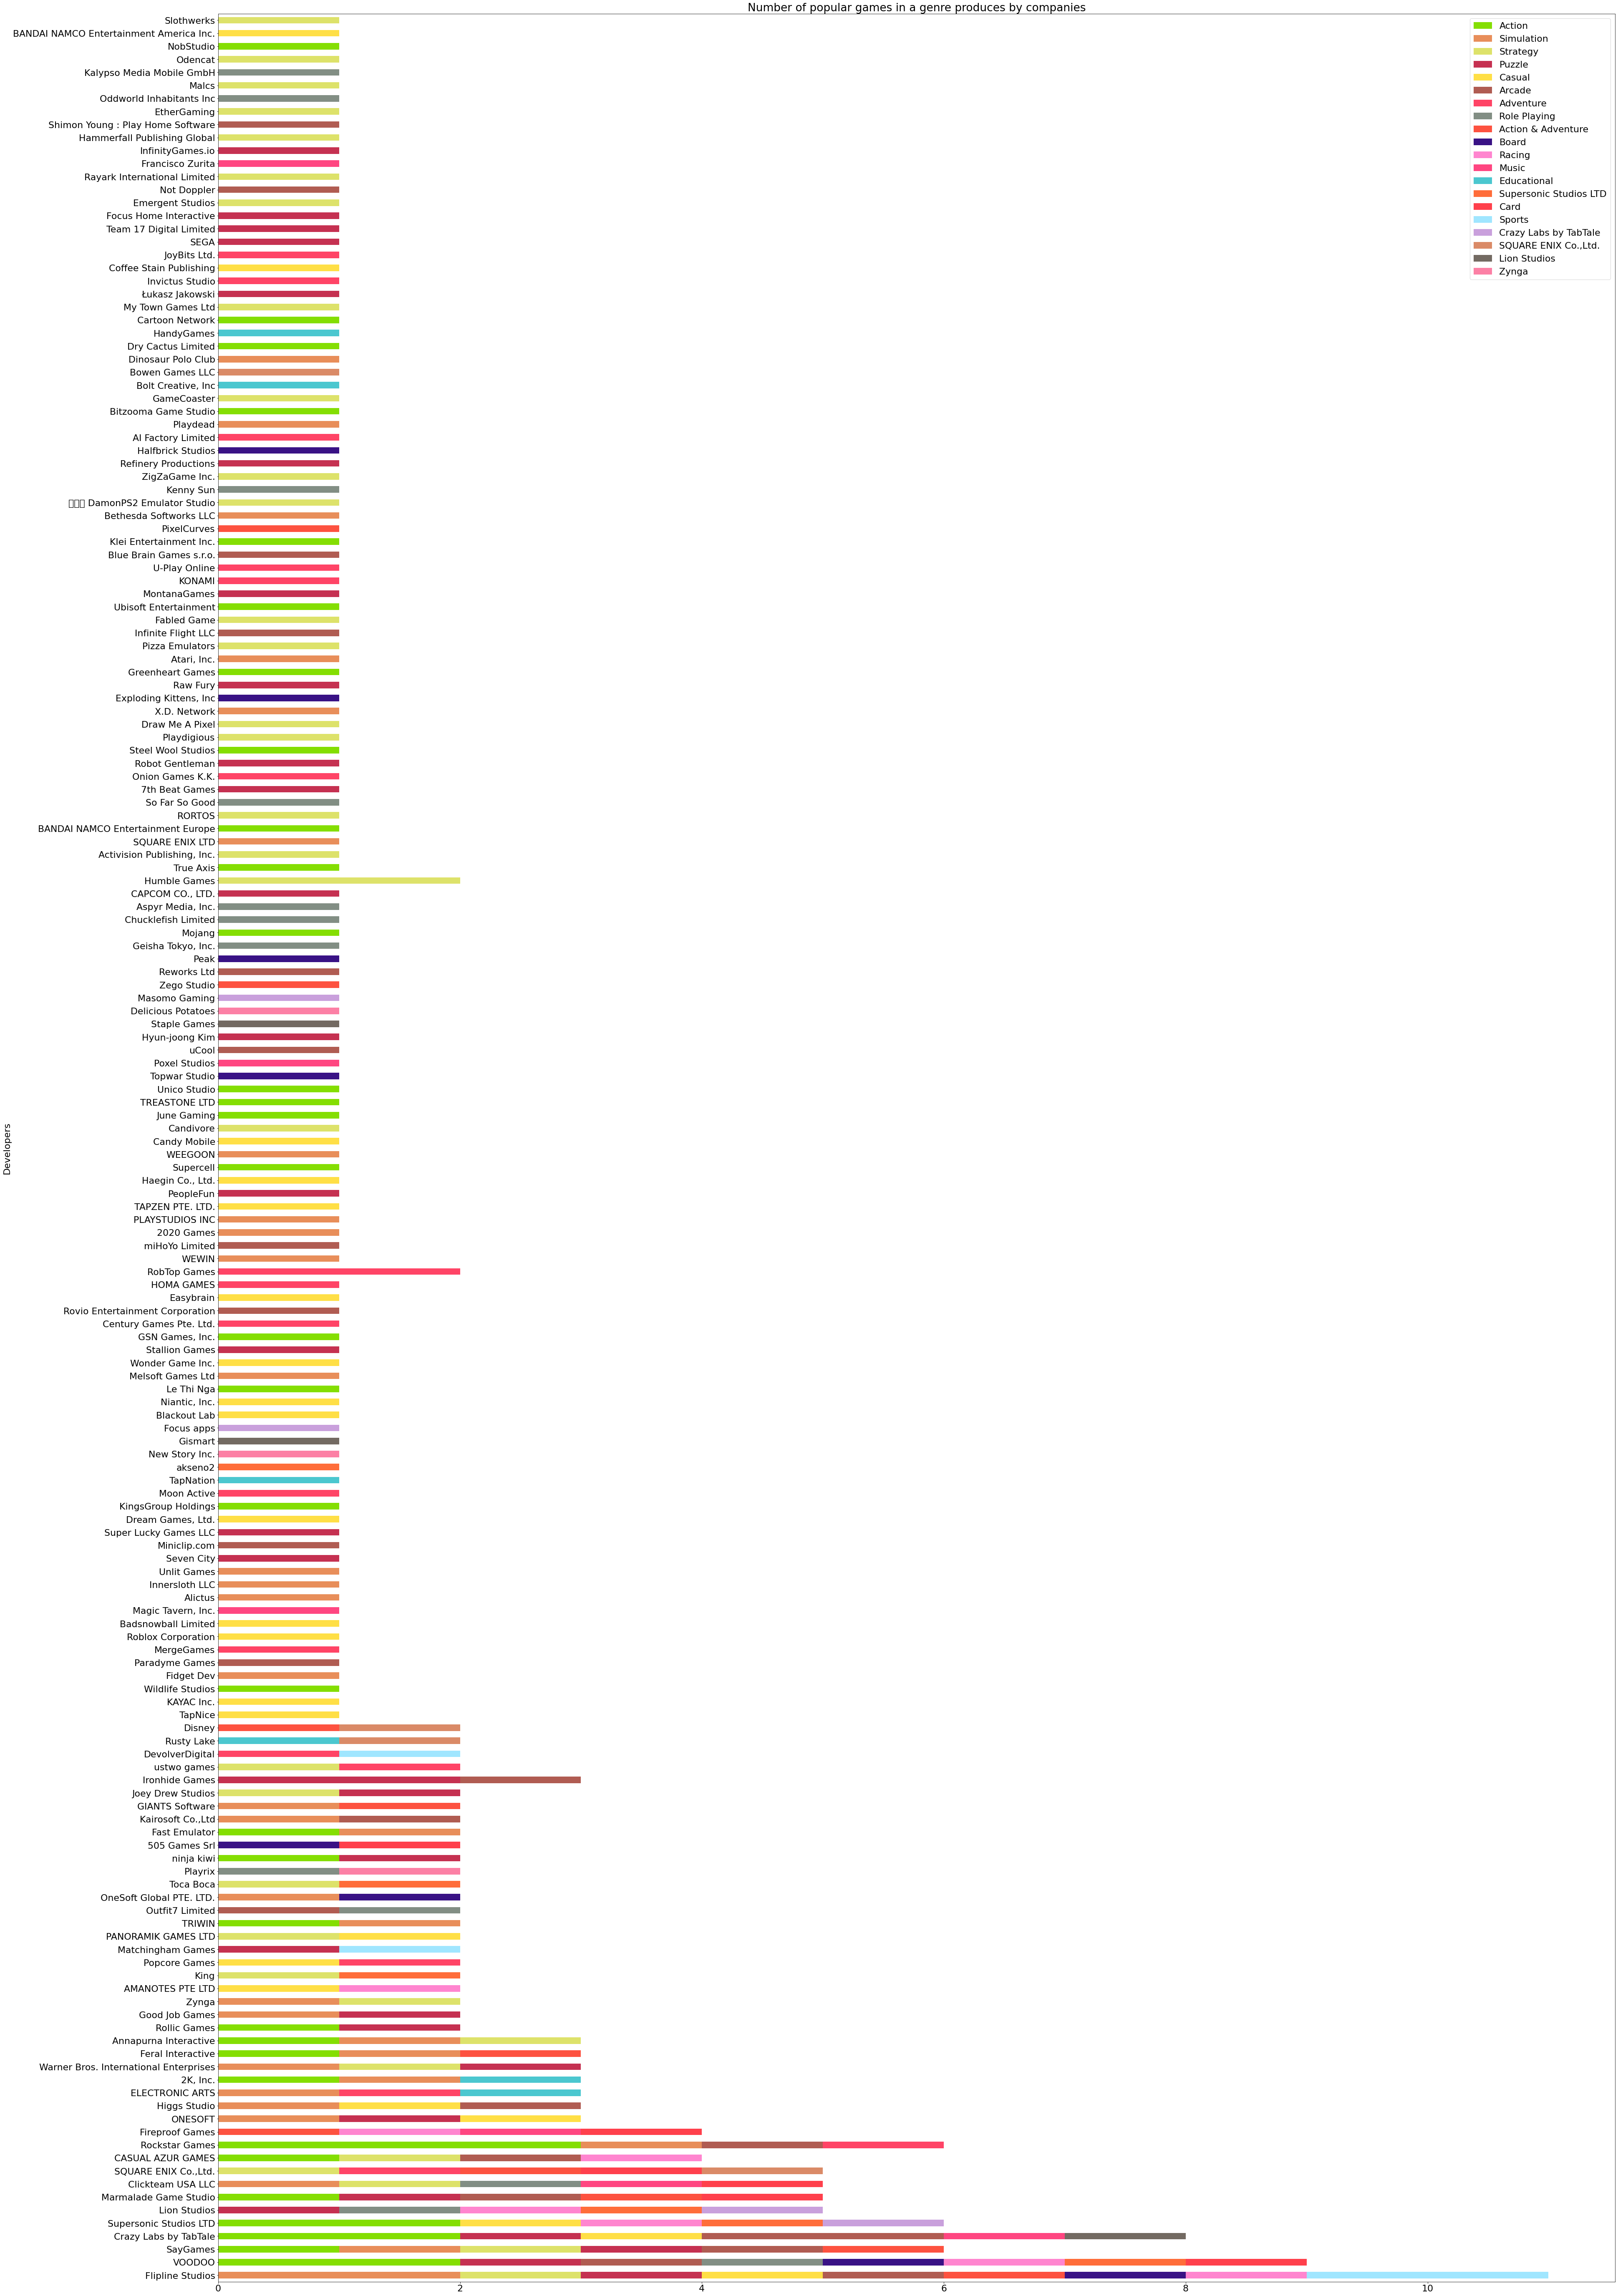

In [10]:
fields = dg_pars.keys()
labels = genre_most_com 
dic = {}
for key in dg_pars:
    counted_list = Counter(dg_pars[key])
    dic[key] = [];
    for name in labels:        
        if name in counted_list.keys():
            dic[key].append(counted_list.get(name))
        else:
            dic[key].append(0)
dic = collections.OrderedDict(sorted(dic.items(), key= lambda x: len([x for x in x[1] if x > 0]), reverse=True))
dd = pd.DataFrame(list(dic.values()), columns = labels)
dd.insert(0, 'Developers', dic.keys())
plot = dd.plot(x='Developers', kind='barh', color=colors, stacked=True, title='Number of popular games in a genre produces by companies', figsize=(60, 100))

In [ ]:
fig = plot.get_figure()
fig.savefig("output.png")

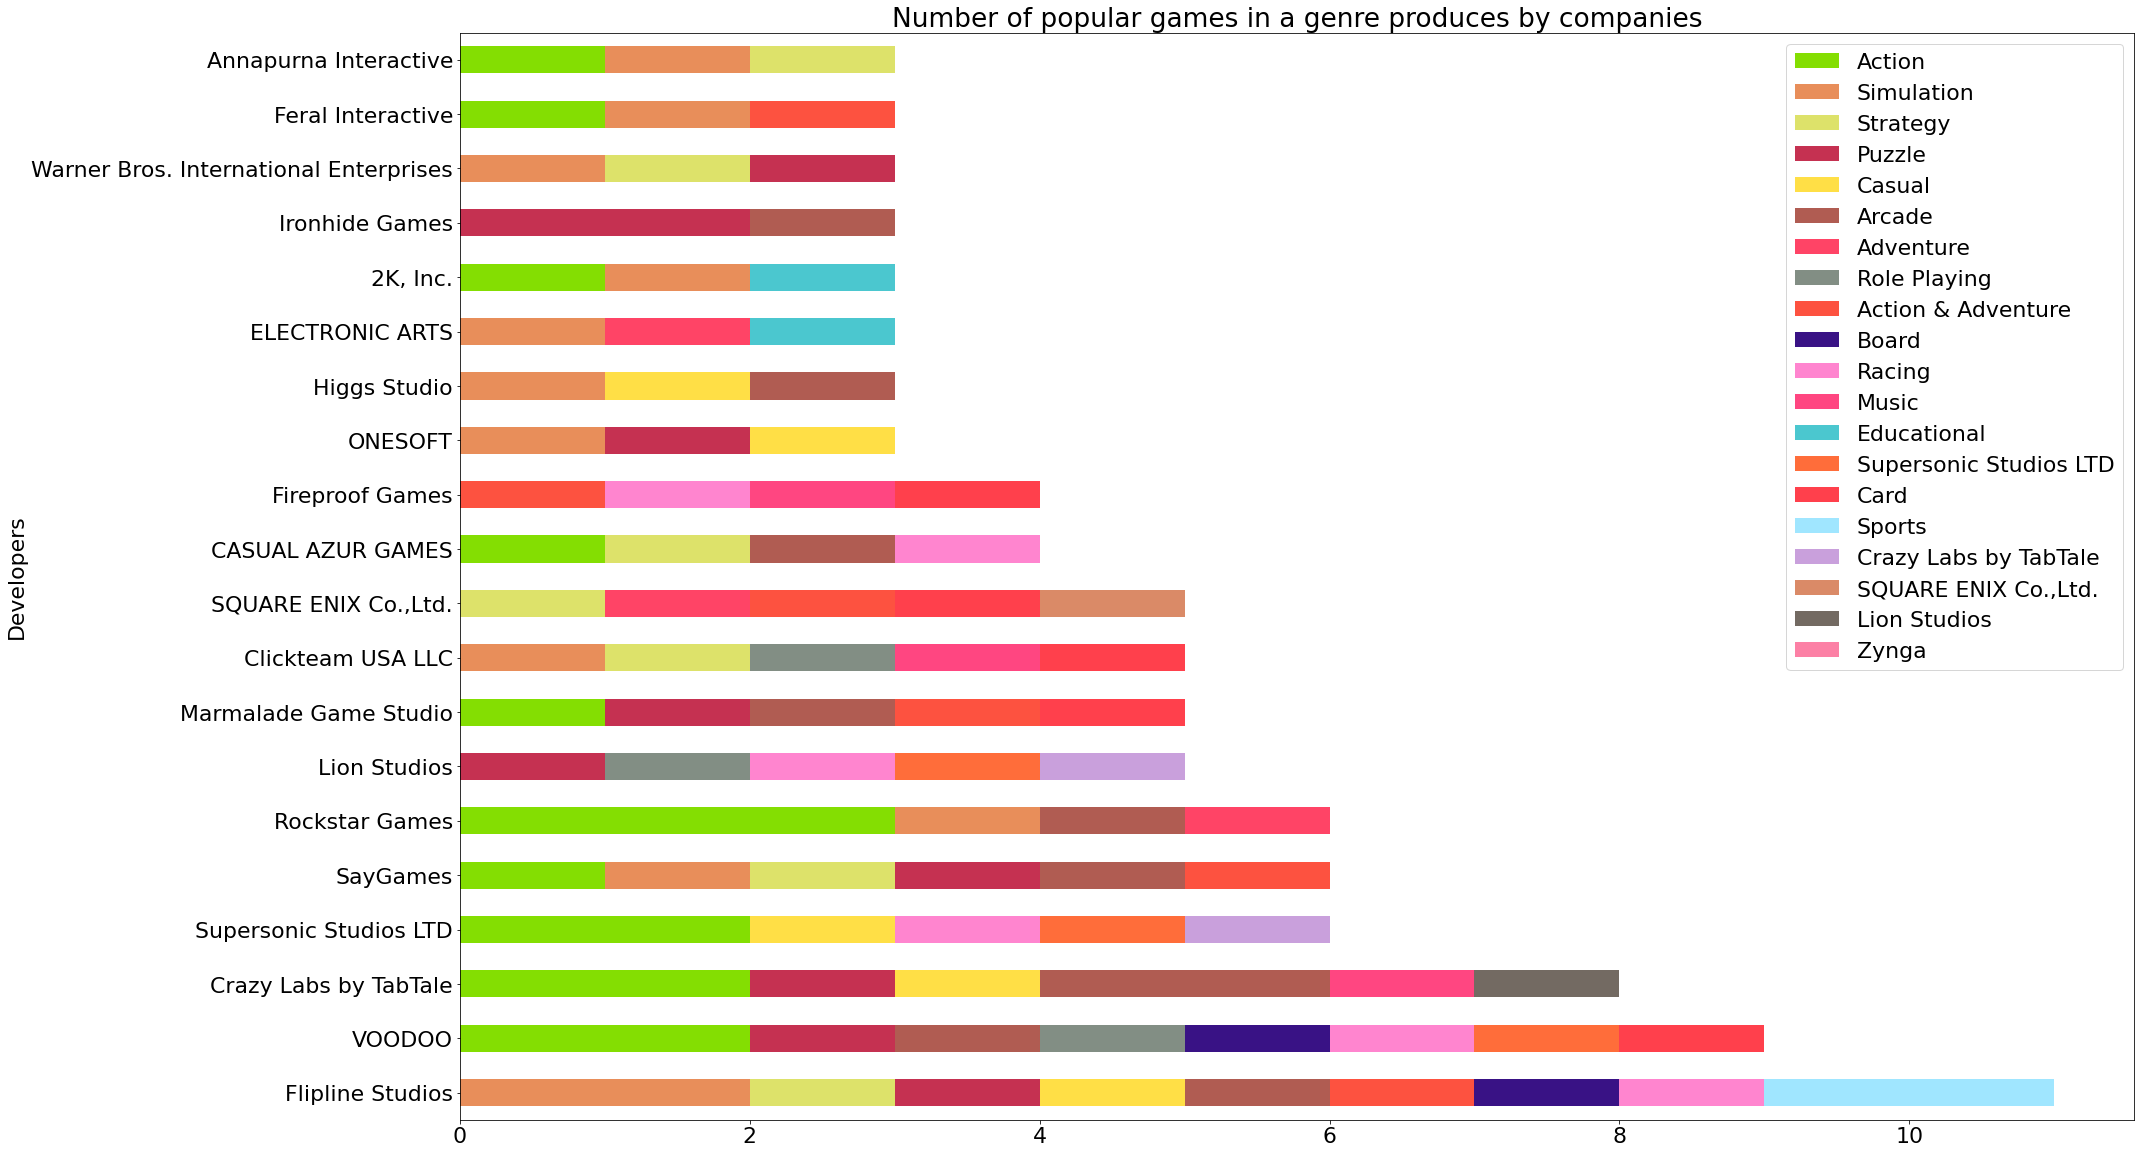

In [11]:
fields = ds_pars_2.keys()
labels = genre_most_com 
dic = {}
for key in ds_pars_2:
    counted_list = Counter(ds_pars_2[key])
    dic[key] = [];
    for name in labels:        
        if name in counted_list.keys():
            dic[key].append(counted_list.get(name))
        else:
            dic[key].append(0)
#dic = collections.OrderedDict(sorted(dic.items(), key= lambda x: len([x for x in x[1] if x > 0]), reverse=True))
dd = pd.DataFrame(list(dic.values()), columns = labels)
dd.insert(0, 'Developers', dic.keys())
plot = dd.plot(x='Developers', kind='barh', color=colors, stacked=True, title='Number of popular games in a genre produces by companies', figsize=(30, 20))

In [ ]:
fig = plot.get_figure()
fig.savefig("output2.png")